# TP -  Les concepts des séries temporelles

Analyser les séries tremporelles suivantes:

   - série temporelle sunspot : nombre annuel de tâches solaires de 1790 à 1970. 
   - Série beer : production mensuelle de bière en Australie, en mégalitres, de janvier 1956 à aout 1995
   - Série lynx : nombre annuel de lynx capturés au Canada, de 1821 à 1934

To do
- Charger et visualiser chaque série
- Décrire les différentes composantes de chaque série avant et après sa décomposition.
- Analyser la variance et l'autocorrélation de chaque série
- Tester la saisonnalité des séries et les stationnariser si besoin.
- Utiliser le Modèle ARIMA pour forcaster les série dans le temps

## Série Sunspot

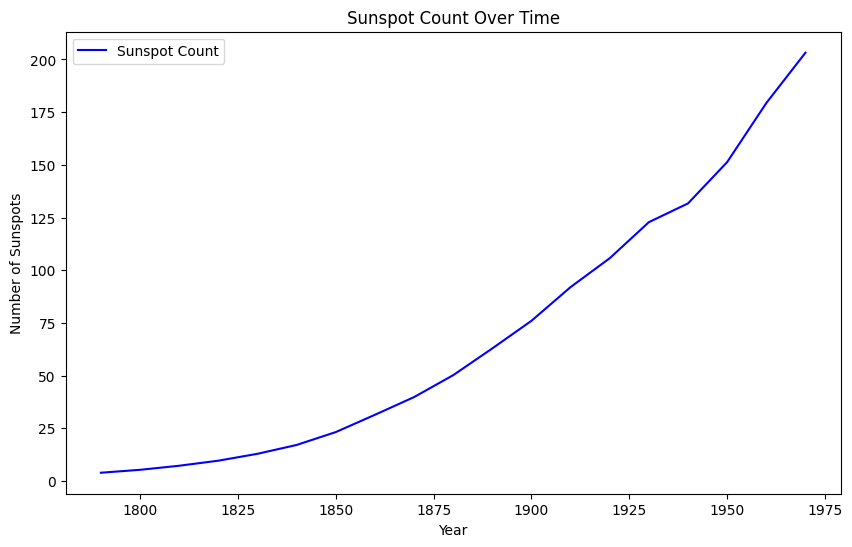

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Charger la série
sunspot_data = pd.read_csv("uspop.csv")
sunspot_data.rename(columns={"t": "Year", "uspop": "Sunspot_Count"}, inplace=True)

# Visualisation
plt.figure(figsize=(10, 6))
plt.plot(sunspot_data["Year"], sunspot_data["Sunspot_Count"], label="Sunspot Count", color="blue")
plt.title("Sunspot Count Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Sunspots")
plt.legend()
plt.show()

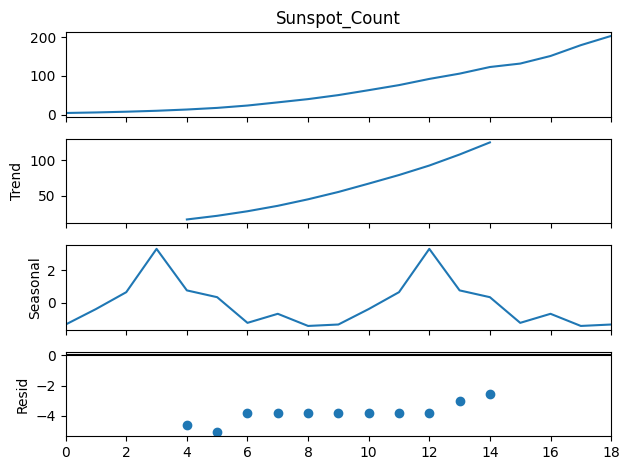

Trend description:
 count     11.000000
mean      61.356869
std       36.248102
min       16.724444
25%       32.084444
50%       55.366667
75%       85.827778
max      124.988889
Name: trend, dtype: float64

Seasonal description:
 count    19.000000
mean     -0.070809
std       1.457741
min      -1.434259
25%      -1.294259
50%      -0.389815
75%       0.654630
max       3.332407
Name: seasonal, dtype: float64

Residual description:
 count    11.000000
mean     -3.821296
std       0.670714
min      -5.109630
25%      -3.821296
50%      -3.821296
75%      -3.821296
max      -2.532963
Name: resid, dtype: float64


In [2]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Décomposer la série en tendance, saisonnalité et résidus
decomposition = seasonal_decompose(sunspot_data["Sunspot_Count"], model="additive", period=9)

# Visualisation des composantes
decomposition.plot()
plt.show()

# Description des composantes
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

print("Trend description:\n", trend.describe())
print("\nSeasonal description:\n", seasonal.describe())
print("\nResidual description:\n", residual.describe())

Variance de la série : 3995.1293608187134


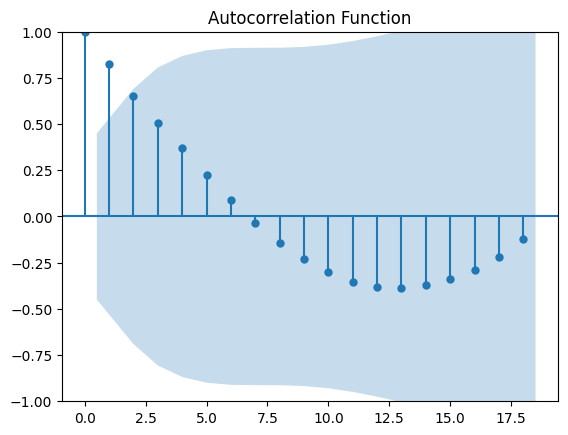

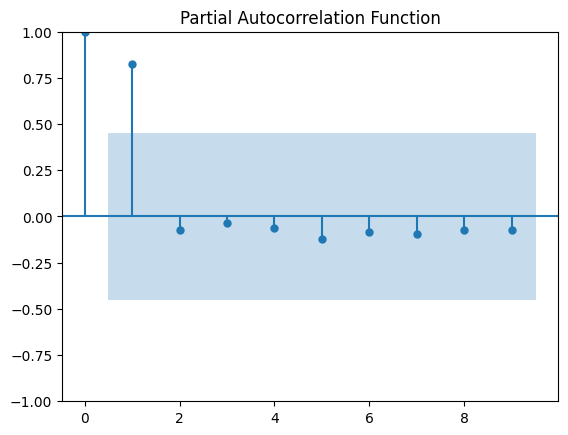

In [3]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Analyse de la variance
variance = sunspot_data["Sunspot_Count"].var()
print(f"Variance de la série : {variance}")

# Nombre total d'observations
n_obs = len(sunspot_data["Sunspot_Count"])

# Ajuster les lags au maximum permis
max_lags_pacf = n_obs // 2
max_lags_acf = n_obs - 1

# Autocorrélation
plot_acf(sunspot_data["Sunspot_Count"], lags=max_lags_acf)
plt.title("Autocorrelation Function")
plt.show()

# Partial autocorrelation
plot_pacf(sunspot_data["Sunspot_Count"], lags=max_lags_pacf)
plt.title("Partial Autocorrelation Function")
plt.show()

Test ADF :
Statistic : 8.481325502387902
P-value : 1.0
Critical Values : {'1%': -3.859073285322359, '5%': -3.0420456927297668, '10%': -2.6609064197530863}


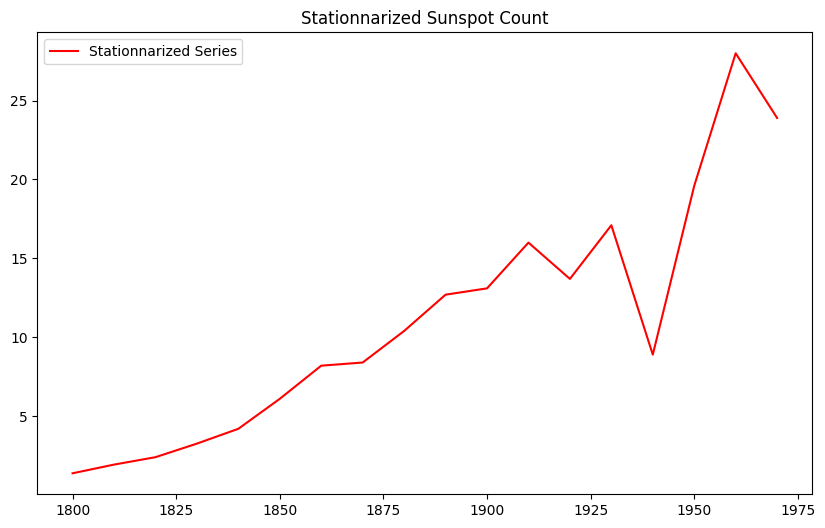

In [4]:
from statsmodels.tsa.stattools import adfuller

# Test de stationnarité avec le test ADF
adf_test = adfuller(sunspot_data["Sunspot_Count"].dropna())
print("Test ADF :")
print(f"Statistic : {adf_test[0]}")
print(f"P-value : {adf_test[1]}")
print(f"Critical Values : {adf_test[4]}")

# Stationnarisation (différenciation si besoin)
if adf_test[1] > 0.05:  # Si non stationnaire
    sunspot_data["Stationary"] = sunspot_data["Sunspot_Count"].diff()
    plt.figure(figsize=(10, 6))
    plt.plot(sunspot_data["Year"], sunspot_data["Stationary"], label="Stationnarized Series", color="red")
    plt.title("Stationnarized Sunspot Count")
    plt.legend()
    plt.show()

c:\Users\aboys\Documents\Simplon\Machine Learning\SVM_AD\.venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


                               SARIMAX Results                                
Dep. Variable:          Sunspot_Count   No. Observations:                   19
Model:                 ARIMA(2, 1, 2)   Log Likelihood                 -52.569
Date:                Tue, 10 Dec 2024   AIC                            115.137
Time:                        13:58:03   BIC                            119.589
Sample:                             0   HQIC                           115.751
                                 - 19                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1541     11.373      0.014      0.989     -22.136      22.445
ar.L2          0.8090     11.133      0.073      0.942     -21.011      22.629
ma.L1          0.6547     11.404      0.057      0.9

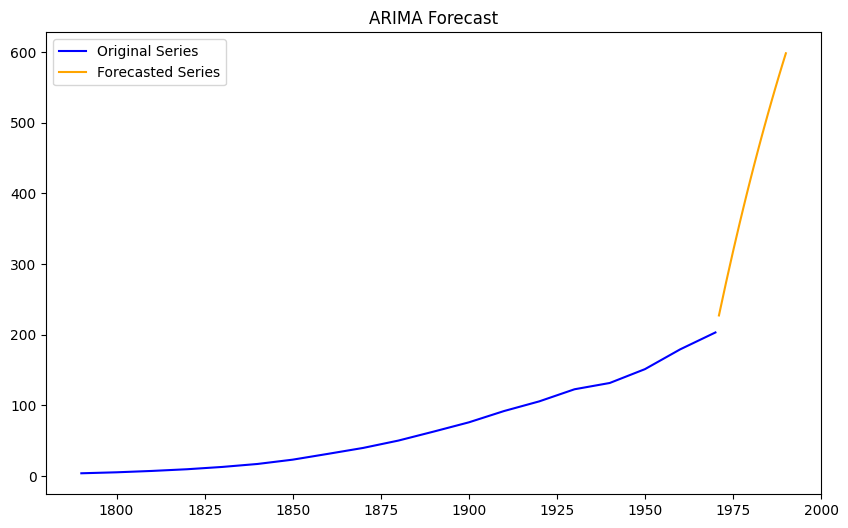

In [5]:
from statsmodels.tsa.arima.model import ARIMA

# Choisir les ordres du modèle (à ajuster selon les données)
p, d, q = 2, 1, 2

# Appliquer le modèle ARIMA
model = ARIMA(sunspot_data["Sunspot_Count"], order=(p, d, q))
fitted_model = model.fit()

# Résumé du modèle
print(fitted_model.summary())

# Prévision sur les 20 prochaines périodes
forecast = fitted_model.forecast(steps=20)
forecast_years = range(sunspot_data["Year"].iloc[-1] + 1, sunspot_data["Year"].iloc[-1] + 21)

# Visualisation des prévisions
plt.figure(figsize=(10, 6))
plt.plot(sunspot_data["Year"], sunspot_data["Sunspot_Count"], label="Original Series", color="blue")
plt.plot(forecast_years, forecast, label="Forecasted Series", color="orange")
plt.title("ARIMA Forecast")
plt.legend()
plt.show()

c:\Users\aboys\Documents\Simplon\Machine Learning\SVM_AD\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\aboys\Documents\Simplon\Machine Learning\SVM_AD\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\aboys\Documents\Simplon\Machine Learning\SVM_AD\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\aboys\Documents\Simplon\Machine Learning\SVM_AD\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\aboys\Documents\Simplon\Machine Learning\SVM_AD

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.27 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=100.123, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=99.915, Time=0.01 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.11 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=99.820, Time=0.01 sec


c:\Users\aboys\Documents\Simplon\Machine Learning\SVM_AD\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\aboys\Documents\Simplon\Machine Learning\SVM_AD\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\aboys\Documents\Simplon\Machine Learning\SVM_AD\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\aboys\Documents\Simplon\Machine Learning\SVM_AD\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\aboys\Documents\Simplon\Machine Learning\SVM_AD

 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.09 sec

Best model:  ARIMA(0,2,0)(0,0,0)[0]          
Total fit time: 0.497 seconds
Meilleur modèle ARIMA :                                SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   19
Model:               SARIMAX(0, 2, 0)   Log Likelihood                 -48.910
Date:                Tue, 10 Dec 2024   AIC                             99.820
Time:                        13:58:04   BIC                            100.653
Sample:                    01-01-1790   HQIC                            99.903
                         - 01-01-1970                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2        18.4715      5.173      3.571     

c:\Users\aboys\Documents\Simplon\Machine Learning\SVM_AD\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\aboys\AppData\Local\Temp\ipykernel_20764\3448500296.py:28: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  forecast_years = pd.date_range(start=sunspot_data.index[-1], periods=forecast_steps + 1, freq="Y")[1:]


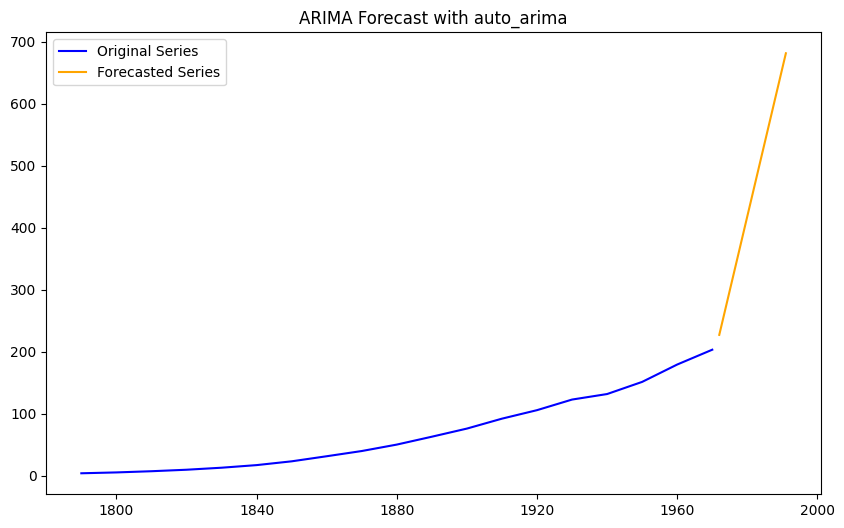

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from pmdarima import auto_arima

# S'assurer que l'index est temporel
sunspot_data.set_index("Year", inplace=True)
sunspot_data.index = pd.to_datetime(sunspot_data.index, format="%Y")

# Recherche automatique des meilleurs paramètres avec auto_arima
auto_model = auto_arima(
    sunspot_data["Sunspot_Count"],
    seasonal=False,  # Indique que la série n'a pas de composante saisonnière
    trace=True,      # Affiche les essais de modèles
    error_action="ignore",  # Ignore les erreurs liées à certains modèles
    suppress_warnings=True, # Supprime les avertissements
    stepwise=True,          # Utilise un processus de recherche plus rapide
    max_order=10            # Limite les paramètres p, d, q pour éviter la surcomplexité
)

# Résumé du modèle trouvé
print("Meilleur modèle ARIMA :", auto_model.summary())

# Prévisions sur les 20 prochaines années
forecast_steps = 20
forecast = auto_model.predict(n_periods=forecast_steps)

# Générer un index pour les prévisions
forecast_years = pd.date_range(start=sunspot_data.index[-1], periods=forecast_steps + 1, freq="Y")[1:]

# Visualisation des prévisions
plt.figure(figsize=(10, 6))
plt.plot(sunspot_data.index, sunspot_data["Sunspot_Count"], label="Original Series", color="blue")
plt.plot(forecast_years, forecast, label="Forecasted Series", color="orange")
plt.title("ARIMA Forecast with auto_arima")
plt.legend()
plt.show()

## Série Beer

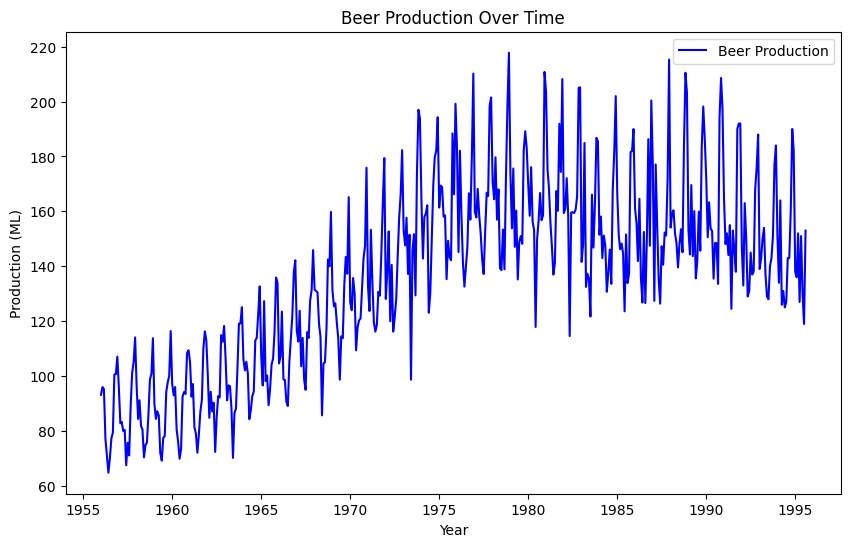

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Charger la série
beer_data = pd.read_csv("beer.csv", header=None, names=["Month", "Production"])
beer_data["Month"] = pd.to_datetime(beer_data["Month"], format="%Y-%m")
beer_data.set_index("Month", inplace=True)

# Visualisation
plt.figure(figsize=(10, 6))
plt.plot(beer_data.index, beer_data["Production"], label="Beer Production", color="blue")
plt.title("Beer Production Over Time")
plt.xlabel("Year")
plt.ylabel("Production (ML)")
plt.legend()
plt.show()

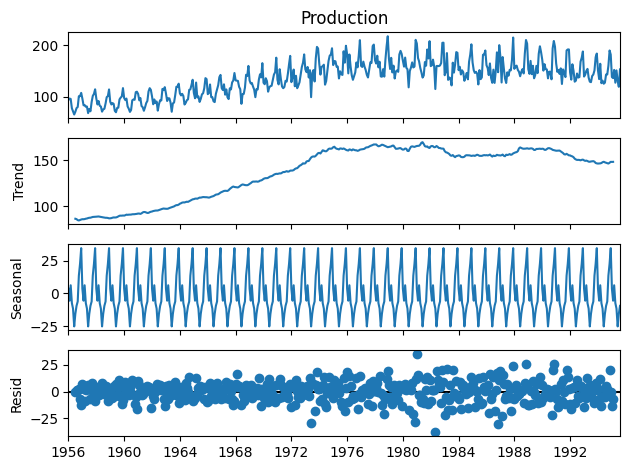

Trend description:
 count    464.000000
mean     136.991676
std       27.907290
min       84.295833
25%      109.708333
50%      150.166667
75%      161.038542
max      169.350000
Name: trend, dtype: float64

Seasonal description:
 count    476.000000
mean      -0.135391
std       16.138641
min      -25.051691
25%      -11.503226
50%       -6.113986
75%        6.215633
max       34.421484
Name: seasonal, dtype: float64

Residual description:
 count    464.000000
mean      -0.014646
std        9.155484
min      -37.930107
25%       -5.911174
50%        0.662490
75%        5.447059
max       34.735995
Name: resid, dtype: float64


In [8]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Décomposer la série en tendance, saisonnalité et résidus
decomposition = seasonal_decompose(beer_data["Production"], model="additive", period=12)

# Visualisation des composantes
decomposition.plot()
plt.show()

# Description des composantes
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

print("Trend description:\n", trend.describe())
print("\nSeasonal description:\n", seasonal.describe())
print("\nResidual description:\n", residual.describe())

Variance de la série : 1138.3015364882797


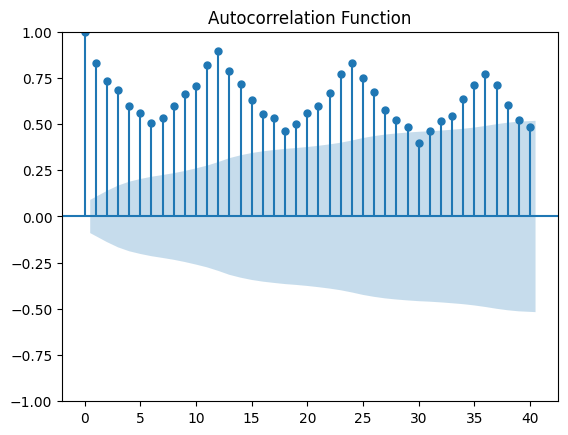

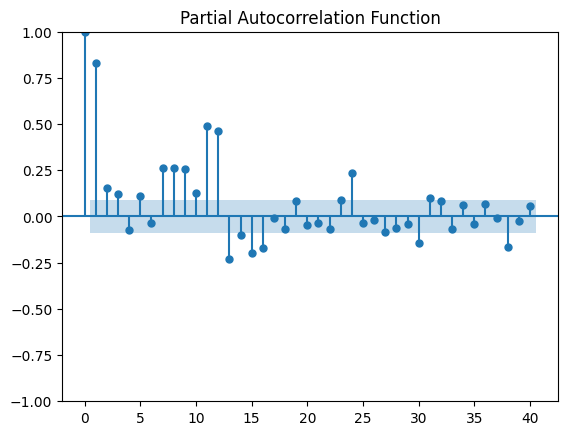

In [9]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Analyse de la variance
variance = beer_data["Production"].var()
print(f"Variance de la série : {variance}")

# Autocorrélation
plot_acf(beer_data["Production"], lags=40)
plt.title("Autocorrelation Function")
plt.show()

plot_pacf(beer_data["Production"], lags=40)
plt.title("Partial Autocorrelation Function")
plt.show()

Test ADF :
Statistic : -2.282661418787573
P-value : 0.17762099829132627
Critical Values : {'1%': -3.4447087976702284, '5%': -2.867871300049488, '10%': -2.5701423432047443}


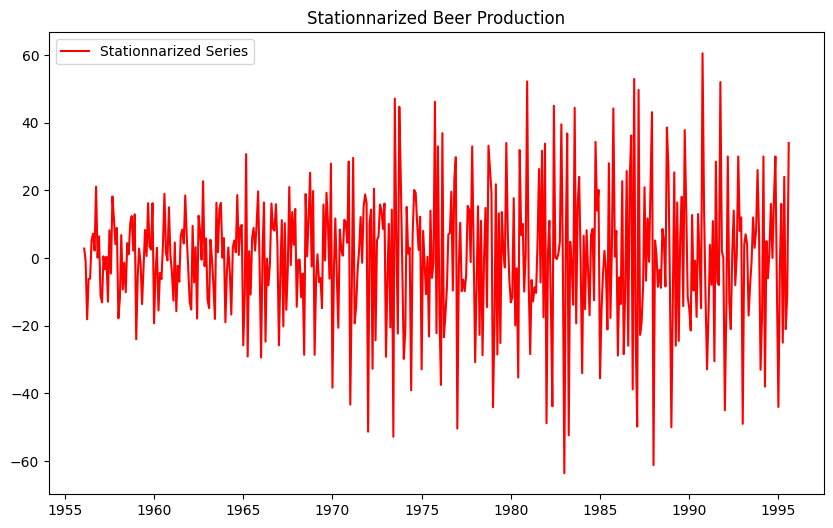

In [10]:
from statsmodels.tsa.stattools import adfuller

# Test de stationnarité avec le test ADF
adf_test = adfuller(beer_data["Production"].dropna())
print("Test ADF :")
print(f"Statistic : {adf_test[0]}")
print(f"P-value : {adf_test[1]}")
print(f"Critical Values : {adf_test[4]}")

# Stationnarisation (différenciation si besoin)
if adf_test[1] > 0.05:  # Si non stationnaire
    beer_data["Stationary"] = beer_data["Production"].diff()
    plt.figure(figsize=(10, 6))
    plt.plot(beer_data.index, beer_data["Stationary"], label="Stationnarized Series", color="red")
    plt.title("Stationnarized Beer Production")
    plt.legend()
    plt.show()

c:\Users\aboys\Documents\Simplon\Machine Learning\SVM_AD\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\aboys\Documents\Simplon\Machine Learning\SVM_AD\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\aboys\Documents\Simplon\Machine Learning\SVM_AD\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\aboys\Documents\Simplon\Machine Learning\SVM_AD\.venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autore

                               SARIMAX Results                                
Dep. Variable:             Production   No. Observations:                  476
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -2024.362
Date:                Tue, 10 Dec 2024   AIC                           4058.724
Time:                        13:58:05   BIC                           4079.541
Sample:                    01-01-1956   HQIC                          4066.910
                         - 08-01-1995                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3125      0.099     -3.157      0.002      -0.507      -0.118
ar.L2          0.3176      0.075      4.212      0.000       0.170       0.465
ma.L1         -0.1015      0.081     -1.259      0.2

C:\Users\aboys\AppData\Local\Temp\ipykernel_20764\2549002674.py:15: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_months = pd.date_range(start=beer_data.index[-1], periods=13, freq='M')[1:]


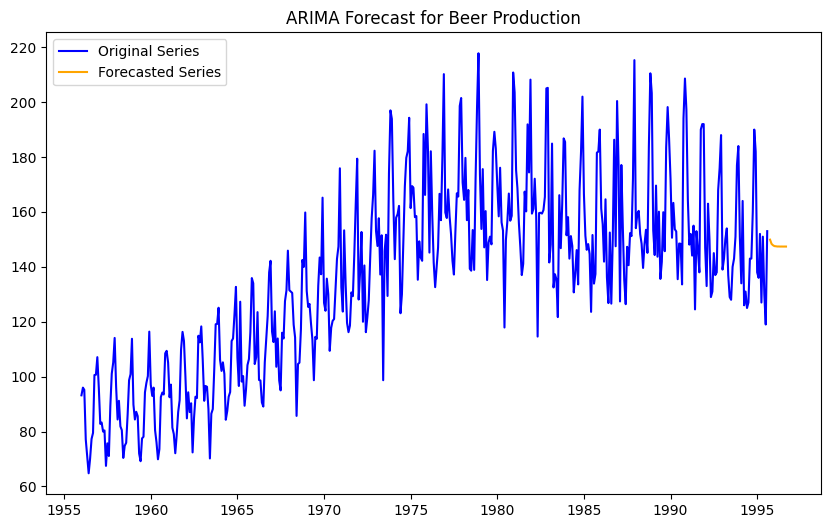

In [11]:
from statsmodels.tsa.arima.model import ARIMA

# Choisir les ordres du modèle (à ajuster selon les données)
p, d, q = 2, 1, 2

# Appliquer le modèle ARIMA
model = ARIMA(beer_data["Production"], order=(p, d, q))
fitted_model = model.fit()

# Résumé du modèle
print(fitted_model.summary())

# Prévision sur les 12 prochains mois
forecast = fitted_model.forecast(steps=12)
forecast_months = pd.date_range(start=beer_data.index[-1], periods=13, freq='M')[1:]

# Visualisation des prévisions
plt.figure(figsize=(10, 6))
plt.plot(beer_data.index, beer_data["Production"], label="Original Series", color="blue")
plt.plot(forecast_months, forecast, label="Forecasted Series", color="orange")
plt.title("ARIMA Forecast for Beer Production")
plt.legend()
plt.show()

Performing stepwise search to minimize aic


c:\Users\aboys\Documents\Simplon\Machine Learning\SVM_AD\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\aboys\Documents\Simplon\Machine Learning\SVM_AD\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\aboys\Documents\Simplon\Machine Learning\SVM_AD\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\aboys\Documents\Simplon\Machine Learning\SVM_AD\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\aboys\Documents\Simplon\Machine Learning\SVM_AD

 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=3557.177, Time=0.85 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=4180.337, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=3905.859, Time=0.18 sec


c:\Users\aboys\Documents\Simplon\Machine Learning\SVM_AD\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\aboys\Documents\Simplon\Machine Learning\SVM_AD\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\aboys\Documents\Simplon\Machine Learning\SVM_AD\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=3940.279, Time=0.24 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=4178.356, Time=0.02 sec


c:\Users\aboys\Documents\Simplon\Machine Learning\SVM_AD\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\aboys\Documents\Simplon\Machine Learning\SVM_AD\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=3897.413, Time=0.38 sec


c:\Users\aboys\Documents\Simplon\Machine Learning\SVM_AD\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(1,0,0)[12] intercept   : AIC=inf, Time=0.79 sec


c:\Users\aboys\Documents\Simplon\Machine Learning\SVM_AD\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(2,0,1)[12] intercept   : AIC=3554.037, Time=2.21 sec


c:\Users\aboys\Documents\Simplon\Machine Learning\SVM_AD\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(2,0,0)[12] intercept   : AIC=3645.528, Time=1.50 sec


c:\Users\aboys\Documents\Simplon\Machine Learning\SVM_AD\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(2,0,2)[12] intercept   : AIC=inf, Time=2.90 sec


c:\Users\aboys\Documents\Simplon\Machine Learning\SVM_AD\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(1,0,2)[12] intercept   : AIC=3553.485, Time=3.34 sec


c:\Users\aboys\Documents\Simplon\Machine Learning\SVM_AD\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(0,0,2)[12] intercept   : AIC=3810.481, Time=1.49 sec


c:\Users\aboys\Documents\Simplon\Machine Learning\SVM_AD\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(1,0,2)[12] intercept   : AIC=inf, Time=2.92 sec


c:\Users\aboys\Documents\Simplon\Machine Learning\SVM_AD\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(1,0,2)[12] intercept   : AIC=3564.268, Time=3.11 sec


c:\Users\aboys\Documents\Simplon\Machine Learning\SVM_AD\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,2)(1,0,2)[12] intercept   : AIC=3557.879, Time=3.64 sec


c:\Users\aboys\Documents\Simplon\Machine Learning\SVM_AD\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,3)(1,0,2)[12] intercept   : AIC=3493.066, Time=2.49 sec


c:\Users\aboys\Documents\Simplon\Machine Learning\SVM_AD\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,3)(0,0,2)[12] intercept   : AIC=3812.321, Time=1.72 sec


c:\Users\aboys\Documents\Simplon\Machine Learning\SVM_AD\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,3)(1,0,1)[12] intercept   : AIC=inf, Time=1.07 sec


c:\Users\aboys\Documents\Simplon\Machine Learning\SVM_AD\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,3)(2,0,2)[12] intercept   : AIC=inf, Time=2.86 sec


c:\Users\aboys\Documents\Simplon\Machine Learning\SVM_AD\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,3)(0,0,1)[12] intercept   : AIC=3898.084, Time=0.59 sec


c:\Users\aboys\Documents\Simplon\Machine Learning\SVM_AD\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,3)(2,0,1)[12] intercept   : AIC=3502.196, Time=2.36 sec


c:\Users\aboys\Documents\Simplon\Machine Learning\SVM_AD\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,3)(1,0,2)[12] intercept   : AIC=3555.836, Time=2.26 sec


c:\Users\aboys\Documents\Simplon\Machine Learning\SVM_AD\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,3)(1,0,2)[12] intercept   : AIC=3498.411, Time=2.73 sec


c:\Users\aboys\Documents\Simplon\Machine Learning\SVM_AD\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,4)(1,0,2)[12] intercept   : AIC=3538.079, Time=2.66 sec


c:\Users\aboys\Documents\Simplon\Machine Learning\SVM_AD\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,4)(1,0,2)[12] intercept   : AIC=3554.691, Time=2.31 sec


c:\Users\aboys\Documents\Simplon\Machine Learning\SVM_AD\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,4)(1,0,2)[12] intercept   : AIC=3488.186, Time=2.80 sec


c:\Users\aboys\Documents\Simplon\Machine Learning\SVM_AD\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,4)(0,0,2)[12] intercept   : AIC=3792.500, Time=2.51 sec


c:\Users\aboys\Documents\Simplon\Machine Learning\SVM_AD\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,4)(1,0,1)[12] intercept   : AIC=3490.643, Time=1.29 sec


c:\Users\aboys\Documents\Simplon\Machine Learning\SVM_AD\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,4)(2,0,2)[12] intercept   : AIC=inf, Time=3.24 sec


c:\Users\aboys\Documents\Simplon\Machine Learning\SVM_AD\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,4)(0,0,1)[12] intercept   : AIC=3870.217, Time=1.17 sec


c:\Users\aboys\Documents\Simplon\Machine Learning\SVM_AD\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,4)(2,0,1)[12] intercept   : AIC=3500.321, Time=2.60 sec


c:\Users\aboys\Documents\Simplon\Machine Learning\SVM_AD\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,1,4)(1,0,2)[12] intercept   : AIC=3540.957, Time=2.93 sec


c:\Users\aboys\Documents\Simplon\Machine Learning\SVM_AD\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,5)(1,0,2)[12] intercept   : AIC=inf, Time=4.14 sec


c:\Users\aboys\Documents\Simplon\Machine Learning\SVM_AD\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,5)(1,0,2)[12] intercept   : AIC=inf, Time=2.93 sec


c:\Users\aboys\Documents\Simplon\Machine Learning\SVM_AD\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,1,3)(1,0,2)[12] intercept   : AIC=3536.804, Time=3.09 sec


c:\Users\aboys\Documents\Simplon\Machine Learning\SVM_AD\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,1,5)(1,0,2)[12] intercept   : AIC=inf, Time=4.09 sec


c:\Users\aboys\Documents\Simplon\Machine Learning\SVM_AD\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,4)(1,0,2)[12]             : AIC=3481.908, Time=2.83 sec


c:\Users\aboys\Documents\Simplon\Machine Learning\SVM_AD\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,4)(0,0,2)[12]             : AIC=inf, Time=2.57 sec


c:\Users\aboys\Documents\Simplon\Machine Learning\SVM_AD\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,4)(1,0,1)[12]             : AIC=3477.019, Time=1.38 sec


c:\Users\aboys\Documents\Simplon\Machine Learning\SVM_AD\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,4)(0,0,1)[12]             : AIC=3871.397, Time=0.93 sec


c:\Users\aboys\Documents\Simplon\Machine Learning\SVM_AD\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,4)(1,0,0)[12]             : AIC=3662.058, Time=0.81 sec


c:\Users\aboys\Documents\Simplon\Machine Learning\SVM_AD\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,4)(2,0,1)[12]             : AIC=3496.634, Time=2.33 sec


c:\Users\aboys\Documents\Simplon\Machine Learning\SVM_AD\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,4)(0,0,0)[12]             : AIC=4021.833, Time=0.47 sec


c:\Users\aboys\Documents\Simplon\Machine Learning\SVM_AD\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,4)(2,0,0)[12]             : AIC=3570.836, Time=1.92 sec


c:\Users\aboys\Documents\Simplon\Machine Learning\SVM_AD\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,4)(2,0,2)[12]             : AIC=inf, Time=3.00 sec


c:\Users\aboys\Documents\Simplon\Machine Learning\SVM_AD\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,4)(1,0,1)[12]             : AIC=inf, Time=1.20 sec


c:\Users\aboys\Documents\Simplon\Machine Learning\SVM_AD\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,3)(1,0,1)[12]             : AIC=3493.802, Time=1.09 sec


c:\Users\aboys\Documents\Simplon\Machine Learning\SVM_AD\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,1,4)(1,0,1)[12]             : AIC=3477.357, Time=1.52 sec


c:\Users\aboys\Documents\Simplon\Machine Learning\SVM_AD\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,5)(1,0,1)[12]             : AIC=3485.603, Time=1.54 sec


c:\Users\aboys\Documents\Simplon\Machine Learning\SVM_AD\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,3)(1,0,1)[12]             : AIC=3490.514, Time=0.91 sec


c:\Users\aboys\Documents\Simplon\Machine Learning\SVM_AD\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,5)(1,0,1)[12]             : AIC=3524.730, Time=1.37 sec


c:\Users\aboys\Documents\Simplon\Machine Learning\SVM_AD\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,1,3)(1,0,1)[12]             : AIC=3493.570, Time=1.11 sec


c:\Users\aboys\Documents\Simplon\Machine Learning\SVM_AD\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,1,5)(1,0,1)[12]             : AIC=inf, Time=1.77 sec

Best model:  ARIMA(3,1,4)(1,0,1)[12]          
Total fit time: 102.238 seconds
Meilleur modèle ARIMA pour la série Beer :
                                      SARIMAX Results                                       
Dep. Variable:                                    y   No. Observations:                  476
Model:             SARIMAX(3, 1, 4)x(1, 0, [1], 12)   Log Likelihood               -1728.510
Date:                              Tue, 10 Dec 2024   AIC                           3477.019
Time:                                      13:59:48   BIC                           3518.652
Sample:                                  01-01-1956   HQIC                          3493.392
                                       - 08-01-1995                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025     

c:\Users\aboys\Documents\Simplon\Machine Learning\SVM_AD\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\aboys\AppData\Local\Temp\ipykernel_20764\2124718085.py:25: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_beer_index = pd.date_range(start=beer_data.index[-1], periods=forecast_beer_steps + 1, freq="M")[1:]


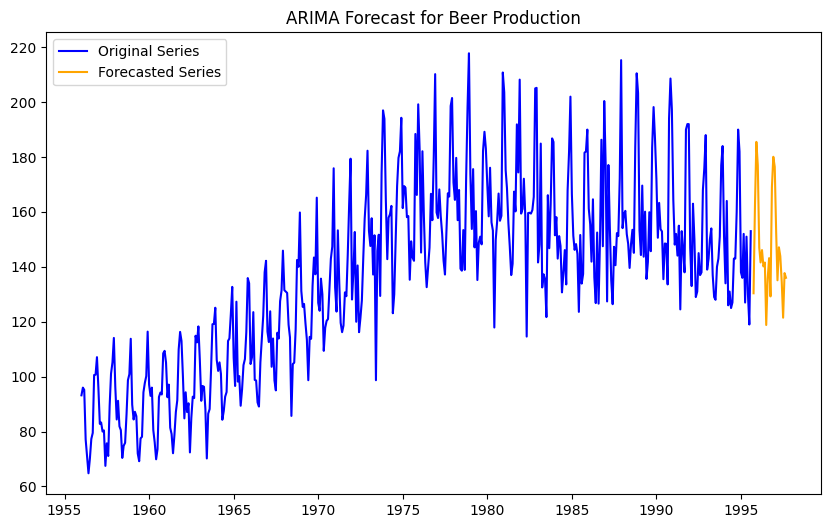

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from pmdarima import auto_arima

# Recherche automatique des meilleurs paramètres avec auto_arima
auto_model_beer = auto_arima(
    beer_data["Production"],
    seasonal=True,  # Les données Beer sont mensuelles, saisonnalité annuelle probable
    m=12,           # Période saisonnière (12 mois)
    trace=True,
    error_action="ignore",
    suppress_warnings=True,
    stepwise=True
)

# Résumé du modèle trouvé
print("Meilleur modèle ARIMA pour la série Beer :")
print(auto_model_beer.summary())

# Prévisions sur les 24 prochains mois
forecast_beer_steps = 24
forecast_beer = auto_model_beer.predict(n_periods=forecast_beer_steps)

# Générer un index temporel pour les prévisions
forecast_beer_index = pd.date_range(start=beer_data.index[-1], periods=forecast_beer_steps + 1, freq="M")[1:]

# Visualisation des prévisions
plt.figure(figsize=(10, 6))
plt.plot(beer_data.index, beer_data["Production"], label="Original Series", color="blue")
plt.plot(forecast_beer_index, forecast_beer, label="Forecasted Series", color="orange")
plt.title("ARIMA Forecast for Beer Production")
plt.legend()
plt.show()

## Série Lynx

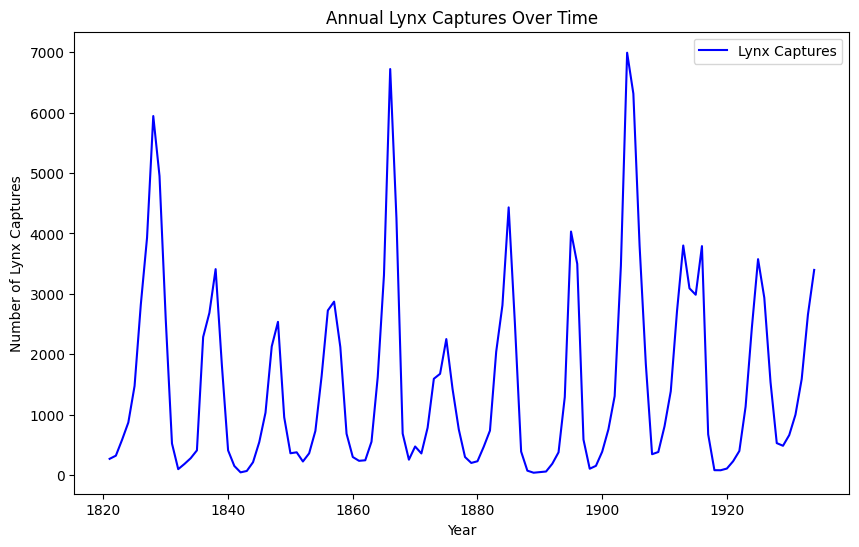

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Charger la série
lynx_data = pd.read_csv("lynx.csv")
lynx_data.rename(columns={"t": "Year", "Lynx": "Captures"}, inplace=True)

# Visualisation
plt.figure(figsize=(10, 6))
plt.plot(lynx_data["Year"], lynx_data["Captures"], label="Lynx Captures", color="blue")
plt.title("Annual Lynx Captures Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Lynx Captures")
plt.legend()
plt.show()

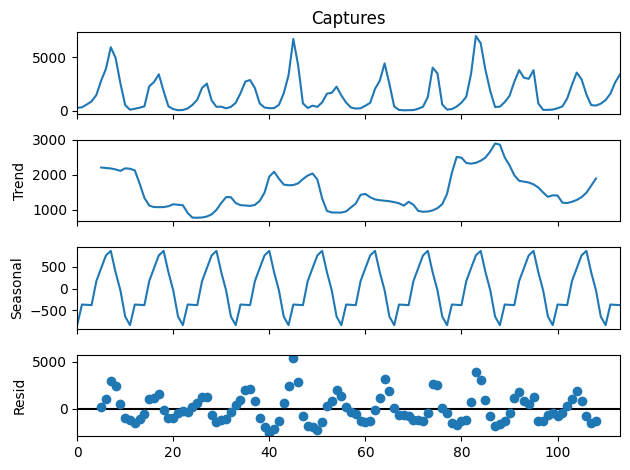

Trend description:
 count     104.000000
mean     1523.762238
std       528.673418
min       765.090909
25%      1121.681818
50%      1355.000000
75%      1904.022727
max      2894.090909
Name: trend, dtype: float64

Seasonal description:
 count    114.000000
mean     -17.149498
std      544.354430
min     -837.755647
25%     -379.119284
50%      -39.948577
75%      467.724151
max      863.142332
Name: seasonal, dtype: float64

Residual description:
 count     104.000000
mean       15.503122
std      1524.477384
min     -2571.324151
25%     -1235.432484
50%      -408.668595
75%       983.303375
max      5385.472819
Name: resid, dtype: float64


In [14]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Décomposer la série en tendance, saisonnalité et résidus
decomposition = seasonal_decompose(lynx_data["Captures"], model="additive", period=11)

# Visualisation des composantes
decomposition.plot()
plt.show()

# Description des composantes
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

print("Trend description:\n", trend.describe())
print("\nSeasonal description:\n", seasonal.describe())
print("\nResidual description:\n", residual.describe())

Variance de la série : 2514900.9200434717


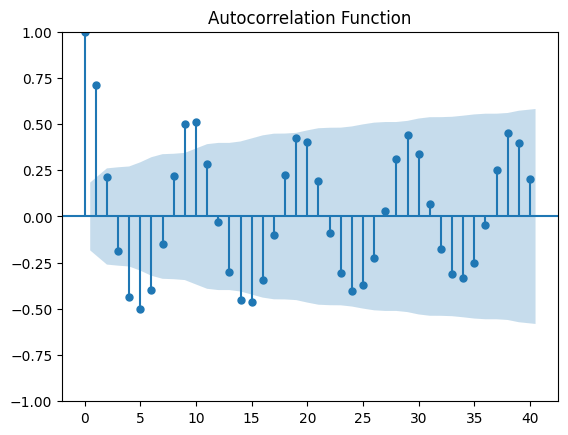

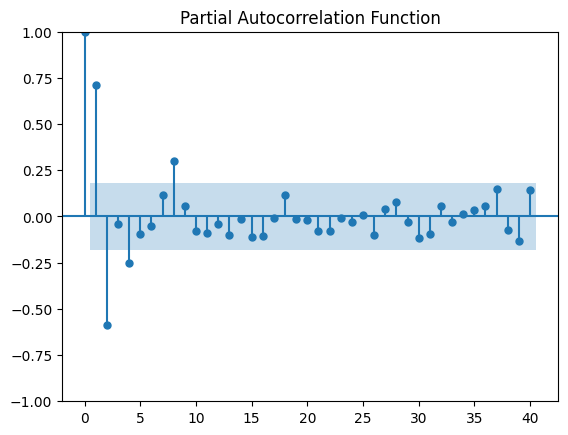

In [15]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Analyse de la variance
variance = lynx_data["Captures"].var()
print(f"Variance de la série : {variance}")

# Autocorrélation
plot_acf(lynx_data["Captures"], lags=40)
plt.title("Autocorrelation Function")
plt.show()

plot_pacf(lynx_data["Captures"], lags=40)
plt.title("Partial Autocorrelation Function")
plt.show()

In [16]:
from statsmodels.tsa.stattools import adfuller

# Test de stationnarité avec le test ADF
adf_test = adfuller(lynx_data["Captures"].dropna())
print("Test ADF :")
print(f"Statistic : {adf_test[0]}")
print(f"P-value : {adf_test[1]}")
print(f"Critical Values : {adf_test[4]}")

# Stationnarisation (différenciation si besoin)
if adf_test[1] > 0.05:  # Si non stationnaire
    lynx_data["Stationary"] = lynx_data["Captures"].diff()
    plt.figure(figsize=(10, 6))
    plt.plot(lynx_data["Year"], lynx_data["Stationary"], label="Stationnarized Series", color="red")
    plt.title("Stationnarized Lynx Captures")
    plt.legend()
    plt.show()

Test ADF :
Statistic : -2.9963036751425576
P-value : 0.03524103535901378
Critical Values : {'1%': -3.4936021509366793, '5%': -2.8892174239808703, '10%': -2.58153320754717}


                               SARIMAX Results                                
Dep. Variable:               Captures   No. Observations:                  114
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -928.806
Date:                Tue, 10 Dec 2024   AIC                           1867.612
Time:                        13:59:49   BIC                           1881.249
Sample:                             0   HQIC                          1873.146
                                - 114                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.2668      0.137      9.222      0.000       0.998       1.536
ar.L2         -0.6787      0.114     -5.974      0.000      -0.901      -0.456
ma.L1         -1.1847      0.182     -6.497      0.0

c:\Users\aboys\Documents\Simplon\Machine Learning\SVM_AD\.venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\aboys\Documents\Simplon\Machine Learning\SVM_AD\.venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


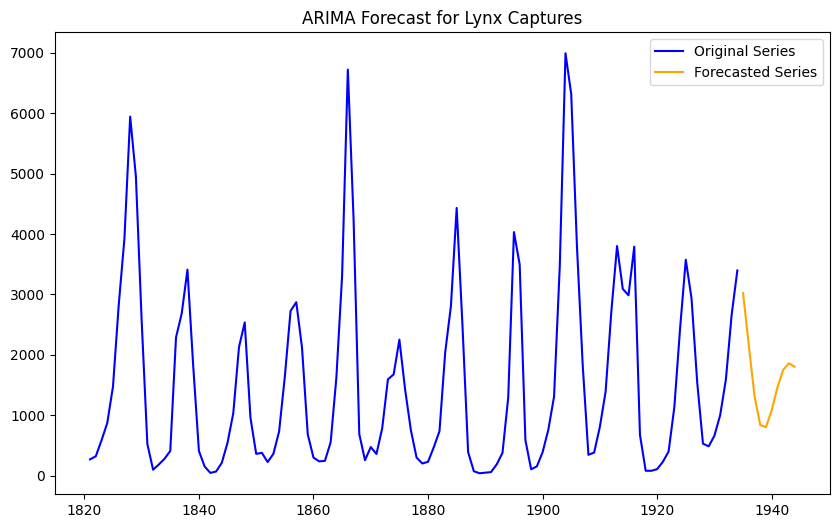

In [17]:
from statsmodels.tsa.arima.model import ARIMA

# Choisir les ordres du modèle (à ajuster selon les données)
p, d, q = 2, 1, 2

# Appliquer le modèle ARIMA
model = ARIMA(lynx_data["Captures"], order=(p, d, q))
fitted_model = model.fit()

# Résumé du modèle
print(fitted_model.summary())

# Prévision sur les 10 prochaines années
forecast = fitted_model.forecast(steps=10)
forecast_years = range(lynx_data["Year"].iloc[-1] + 1, lynx_data["Year"].iloc[-1] + 11)

# Visualisation des prévisions
plt.figure(figsize=(10, 6))
plt.plot(lynx_data["Year"], lynx_data["Captures"], label="Original Series", color="blue")
plt.plot(forecast_years, forecast, label="Forecasted Series", color="orange")
plt.title("ARIMA Forecast for Lynx Captures")
plt.legend()
plt.show()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=1905.046, Time=0.11 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2080.686, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=1934.543, Time=0.01 sec


c:\Users\aboys\Documents\Simplon\Machine Learning\SVM_AD\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\aboys\Documents\Simplon\Machine Learning\SVM_AD\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\aboys\Documents\Simplon\Machine Learning\SVM_AD\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\aboys\Documents\Simplon\Machine Learning\SVM_AD\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\aboys\Documents\Simplon\Machine Learning\SVM_AD

 ARIMA(0,0,1)(0,0,0)[0]             : AIC=1972.683, Time=0.09 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=1903.201, Time=0.03 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=1924.932, Time=0.05 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=1903.127, Time=0.05 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=1903.122, Time=0.03 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=1906.484, Time=0.02 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=1905.109, Time=0.04 sec


c:\Users\aboys\Documents\Simplon\Machine Learning\SVM_AD\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\aboys\Documents\Simplon\Machine Learning\SVM_AD\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\aboys\Documents\Simplon\Machine Learning\SVM_AD\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\aboys\Documents\Simplon\Machine Learning\SVM_AD\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\aboys\Documents\Simplon\Machine Learning\SVM_AD

 ARIMA(3,0,0)(0,0,0)[0]             : AIC=1903.398, Time=0.03 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=1906.826, Time=0.11 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1880.080, Time=0.03 sec


c:\Users\aboys\Documents\Simplon\Machine Learning\SVM_AD\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\aboys\Documents\Simplon\Machine Learning\SVM_AD\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\aboys\Documents\Simplon\Machine Learning\SVM_AD\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1891.075, Time=0.09 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1878.047, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1927.003, Time=0.01 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=1879.966, Time=0.09 sec


c:\Users\aboys\Documents\Simplon\Machine Learning\SVM_AD\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\aboys\Documents\Simplon\Machine Learning\SVM_AD\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\aboys\Documents\Simplon\Machine Learning\SVM_AD\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\aboys\Documents\Simplon\Machine Learning\SVM_AD\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=1882.002, Time=0.10 sec

Best model:  ARIMA(2,0,0)(0,0,0)[0] intercept
Total fit time: 0.911 seconds
Meilleur modèle ARIMA pour la série Lynx :
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  114
Model:               SARIMAX(2, 0, 0)   Log Likelihood                -935.024
Date:                Tue, 10 Dec 2024   AIC                           1878.047
Time:                        13:59:50   BIC                           1888.992
Sample:                    01-01-1821   HQIC                          1882.489
                         - 01-01-1934                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    710.1055   

c:\Users\aboys\Documents\Simplon\Machine Learning\SVM_AD\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\aboys\AppData\Local\Temp\ipykernel_20764\66782729.py:30: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  forecast_lynx_index = pd.date_range(start=lynx_data.index[-1], periods=forecast_lynx_steps + 1, freq="Y")[1:]


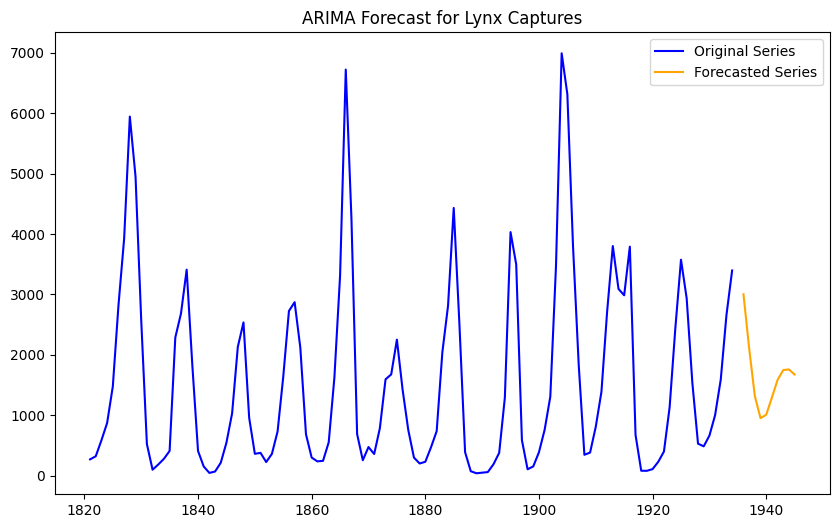

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from pmdarima import auto_arima

# Charger les données Lynx
lynx_data = pd.read_csv("lynx.csv")
lynx_data.rename(columns={"t": "Year", "Lynx": "Captures"}, inplace=True)
lynx_data.set_index("Year", inplace=True)
lynx_data.index = pd.to_datetime(lynx_data.index, format="%Y")

# Recherche automatique des meilleurs paramètres avec auto_arima
auto_model_lynx = auto_arima(
    lynx_data["Captures"],
    seasonal=False,  # Pas de composante saisonnière évidente
    trace=True,
    error_action="ignore",
    suppress_warnings=True,
    stepwise=True
)

# Résumé du modèle trouvé
print("Meilleur modèle ARIMA pour la série Lynx :")
print(auto_model_lynx.summary())

# Prévisions sur les 10 prochaines années
forecast_lynx_steps = 10
forecast_lynx = auto_model_lynx.predict(n_periods=forecast_lynx_steps)

# Générer un index temporel pour les prévisions
forecast_lynx_index = pd.date_range(start=lynx_data.index[-1], periods=forecast_lynx_steps + 1, freq="Y")[1:]

# Visualisation des prévisions
plt.figure(figsize=(10, 6))
plt.plot(lynx_data.index, lynx_data["Captures"], label="Original Series", color="blue")
plt.plot(forecast_lynx_index, forecast_lynx, label="Forecasted Series", color="orange")
plt.title("ARIMA Forecast for Lynx Captures")
plt.legend()
plt.show()